In [78]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [79]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()



2


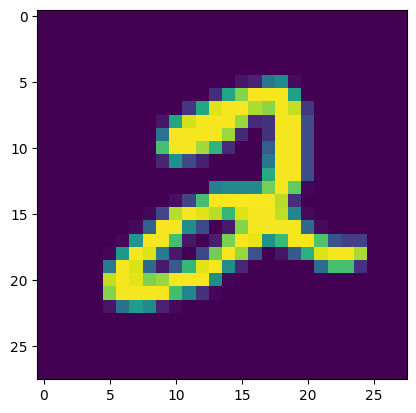

1


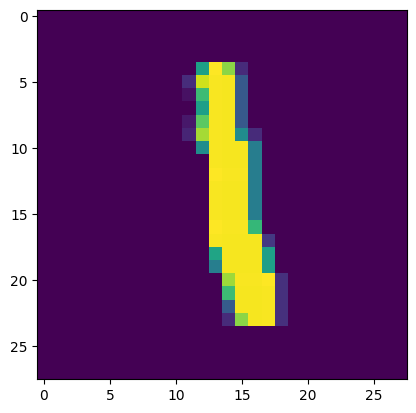

3


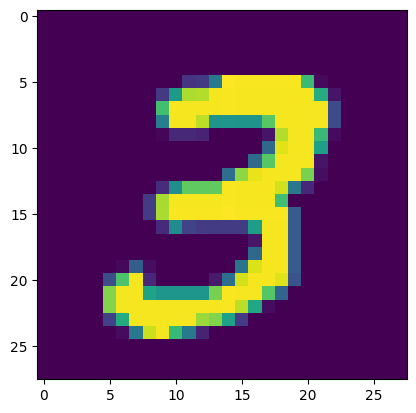

1


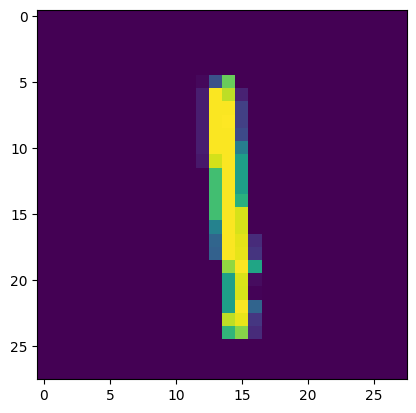

4


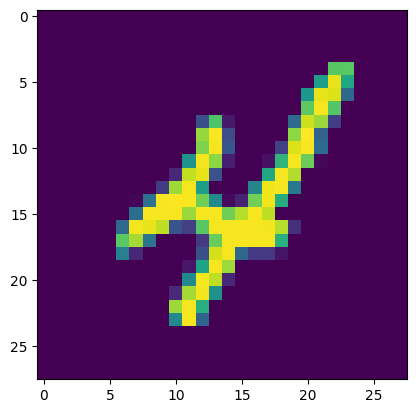

3


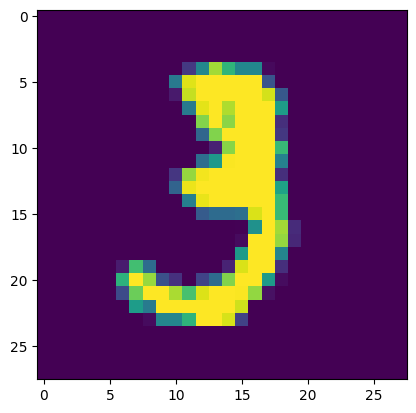

5


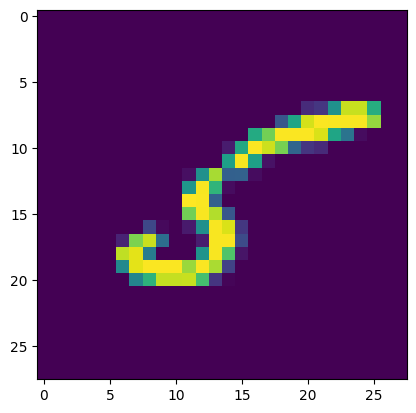

3


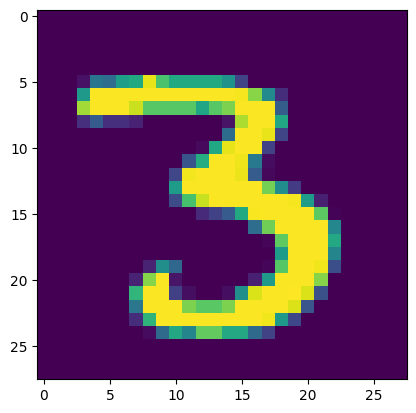

6


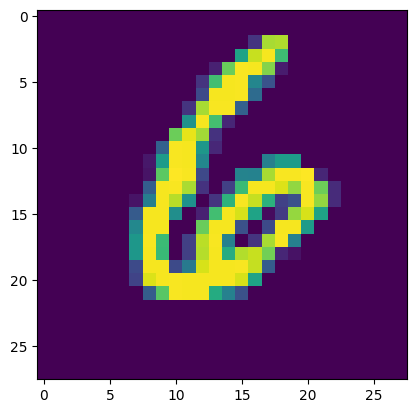

1


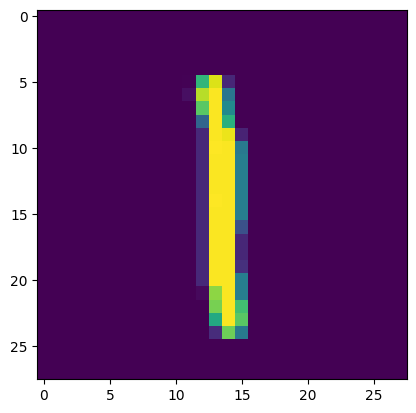

7


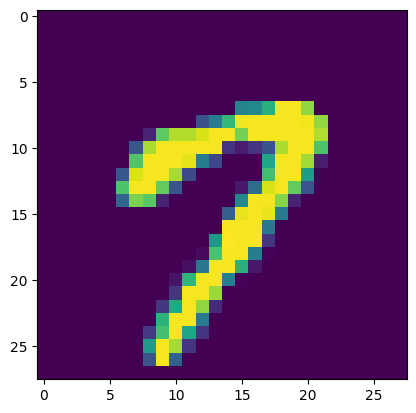

2


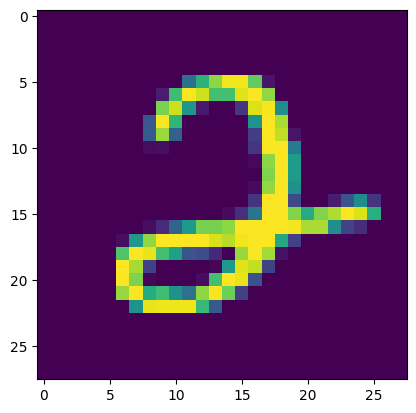

8


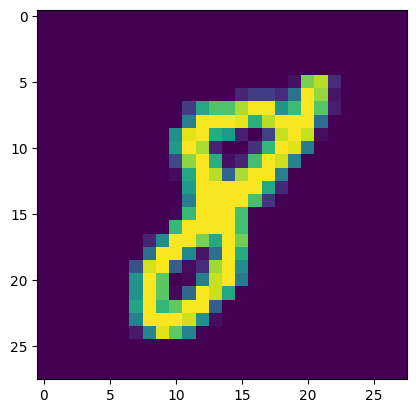

6


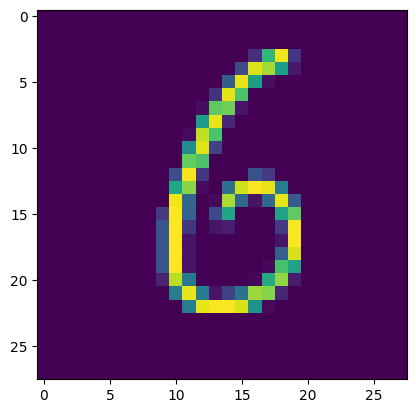

9


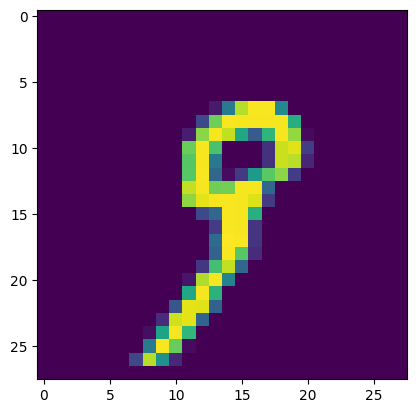

In [94]:
for x in range(5,20):
    img = x_train[x]
    y_tain = to_categorical(y_train)
    print(np.argmax(y_tain[x]))
    plt.imshow(img)
    plt.show()

In [59]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train)


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [60]:
# Flatten the 28x28 images into 1D arrays
x_train = x_train.reshape((x_train.shape[0], 784)) # xtrain.reshape((60000,-1))
x_test = x_test.reshape((x_test.shape[0], 784))



In [61]:
# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[0])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [68]:
# Build the MLP model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))


In [69]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=10, validation_split=0.2)

Epoch 1/20
4800/4800 [==============================] - 9s 2ms/step - loss: 0.2509 - accuracy: 0.9242 - val_loss: 0.1804 - val_accuracy: 0.9462
Epoch 2/20
4800/4800 [==============================] - 9s 2ms/step - loss: 0.1223 - accuracy: 0.9639 - val_loss: 0.1338 - val_accuracy: 0.9603
Epoch 3/20
4800/4800 [==============================] - 9s 2ms/step - loss: 0.0915 - accuracy: 0.9728 - val_loss: 0.1213 - val_accuracy: 0.9659
Epoch 4/20
4800/4800 [==============================] - 9s 2ms/step - loss: 0.0731 - accuracy: 0.9785 - val_loss: 0.1129 - val_accuracy: 0.9681
Epoch 5/20
4800/4800 [==============================] - 9s 2ms/step - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.1039 - val_accuracy: 0.9713
Epoch 6/20
4800/4800 [==============================] - 8s 2ms/step - loss: 0.0517 - accuracy: 0.9843 - val_loss: 0.0865 - val_accuracy: 0.9737
Epoch 7/20
4800/4800 [==============================] - 7s 2ms/step - loss: 0.0444 - accuracy: 0.9865 - val_loss: 0.0958 - val_accuracy:

In [72]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

print(f'Model Summary:\n\n{model.summary()}')

313/313 [==============================] - 0s 702us/step - loss: 0.1276 - accuracy: 0.9779
Test Accuracy: 97.79%
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 32)                4128      
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 121,514
Trainable params: 121,514
Non-trainable params: 0
_

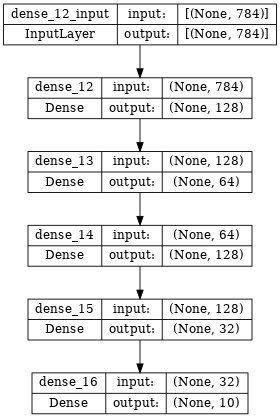

In [75]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)